In [9]:
%matplotlib inline

In [10]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from numpy import array as arr
from ipywidgets import interact
from IPython.display import clear_output

In [11]:
def rbf(x, xp, e):
    return np.exp(-1.0 * (e * np.linalg.norm(np.subtract(x, xp))) ** 2.0)

def drbf(x, xp, e):
    return rbf(x, xp, e) * (-2 * e**2 * (np.subtract(x, xp))) 

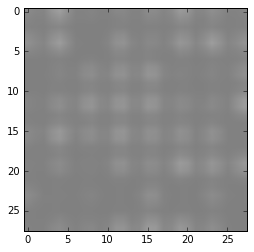

In [17]:
DIM = 28

CDIM = 8
CS = np.linspace(-2, 2, CDIM)

C = np.array([(x, y) for x in CS for y in CS])
W = np.random.random_sample((CDIM ** 2))

e = 5.0

def rbf_mult(x1, x2):
    s = 0.0
    for i, w in enumerate(W):
        s += w * rbf(np.array([x1, x2]), C[i], e)
    return s

def d_rbf_mult(x1, x2):
    return np.array([rbf(np.array([x1, x2]), np.array([c1, c2]), e) for c1 in CS for c2 in CS])

def vis():
    img = np.zeros((DIM, DIM))
    for x, xx in enumerate(np.linspace(-2, 2, DIM)):
        for y, yy in enumerate(np.linspace(-2, 2, DIM)):
            img[x, y] += rbf_mult(xx, yy)
        
    plt.imshow(img, cmap=plt.cm.gray, vmin=-4, vmax=4)
    
vis()

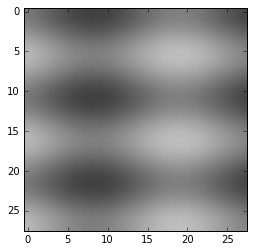

In [13]:
# Define a function to approximate

def true_f(x1, x2):
    return np.sin(x1*4.0) + np.sin(x2*2.0)
    #return x1**2 + x2**2

img = np.zeros((DIM, DIM))
for x, xx in enumerate(np.linspace(-2, 2, DIM)):
    for y, yy in enumerate(np.linspace(-2, 2, DIM)):
        img[x, y] = true_f(xx, yy)
        
plt.imshow(img, cmap=plt.cm.gray, vmin=-4, vmax=4)

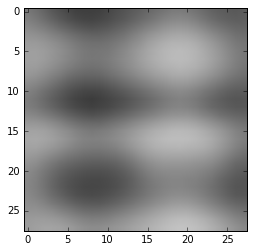

In [14]:
# Train

for i in range(1000):
    x1, x2 = np.random.random_sample() * 4 - 2, np.random.random_sample() * 4 - 2
    
    t = true_f(x1, x2)
    
    W -= 0.2 * (rbf_mult(x1, x2) - t) * d_rbf_mult(x1, x2)
    
    if i % 100 == 0:
        clear_output(wait=True)
        vis()
        plt.show()

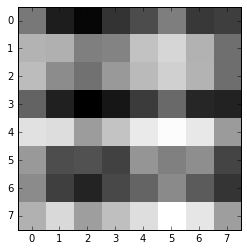

In [15]:
# Plot the learned Ws!

plt.imshow(W.reshape((CDIM, CDIM)), cmap=plt.cm.gray, interpolation='nearest')

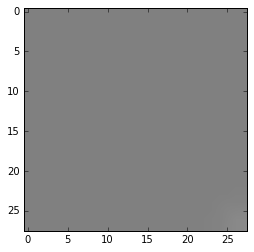

In [16]:
# Show each gaussian separately

for i, w in enumerate(W):
    img = np.zeros((DIM, DIM))
    for x, xx in enumerate(np.linspace(-2, 2, DIM)):
        for y, yy in enumerate(np.linspace(-2, 2, DIM)):
            img[x, y] = w * rbf(np.array([xx, yy]), C[i], e)
    clear_output(wait=True)
    plt.imshow(img, cmap=plt.cm.gray, vmin=-4, vmax=4)
    plt.show()